In [2]:
#pip install bs4

In [3]:
#load the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
import requests
from bs4 import BeautifulSoup

In [4]:
#Read the csv file
laptop_df = pd.read_csv('laptop.csv')



In [5]:
#shape
laptop_df.shape

(24, 4)

In [6]:
#shape
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     24 non-null     object 
 1   price     24 non-null     object 
 2   Ratings   23 non-null     float64
 3   features  24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


In [7]:
#Head
laptop_df.head()

,Title,price,Ratings,features
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
2,Lenovo Intel Celeron Dual Core - (8 GB/256 GB ...,"₹29,490",4.1,Intel Celeron Dual Core Processor8 GB DDR4 RAM...
3,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹38,990",4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
4,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,"₹23,990",4.1,Intel Celeron Dual Core Processor4 GB DDR4 RAM...


In [8]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [10]:
laptop_df['Title'][0]

'Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | ...'

# Extracting Features - Processor, RAM, Storage, OS, Screen size(Using Regex)

In [11]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [12]:
laptop_df['features'][1]

'Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty'

In [13]:
re.findall('^[\w\s]+Processor', laptop_df['features'][0])

['Intel Core i3 Processor']

In [14]:
re.findall('^[A-Za-z0-9_ ]+Processor', laptop_df['features'][0])

['Intel Core i3 Processor']

In [15]:
#re.findall('^[A-Za-z0-9_ ]+Processor', laptop_df['features'][0])

In [16]:
[A-Za-z0-9_ ]

SyntaxError: invalid decimal literal (3503715821.py, line 1)

In [17]:
def getProcessor(x):
    
    return re.findall('^[\w\s]+Processor', x)

In [18]:
laptop_df.head(2)

,Title,price,Ratings,features
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [19]:
laptop_df['Processordetails'] = laptop_df['features'].apply(getProcessor)

In [20]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [21]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [23]:
re.findall('\d+\s*GB[\w\s]*RAM', laptop_df['features'][0])

['8 GB DDR4 RAM']

In [24]:
ram_lambda = lambda x: re.findall('\d+\s*GB[\s\w]*RAM', x)

In [25]:
laptop_df['RAM'] = laptop_df['features'].apply(ram_lambda)

In [26]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]


In [27]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [28]:
re.findall('\d+\s*bit[\w\s]+Operating System', laptop_df['features'][0])

['64 bit Windows 11 Operating System']

In [37]:
laptop_df['OS'] =  laptop_df['features'].apply(lambda x: re.findall('[\d+\s]*bit[\w\s]+Operating System', x))

In [38]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[]


In [39]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [41]:
re.findall('\d+\s*(GB|TB)\s*(HDD|SSD)', laptop_df['features'][0])

[('GB', 'SSD')]

In [42]:
re.findall('(a|b|c)xz', 'axz bfgc bxz dxz cxz')

['a', 'b', 'c']

In [43]:
re.findall('(?:a|b|c)xz', 'axz bfgc bxz dxz cxz')

['axz', 'bxz', 'cxz']

In [44]:
laptop_df['Storage'] =  laptop_df['features'].apply(lambda x: re.findall('\d+\s*(?:GB|TB)\s*(?:HDD|SSD)', x))

In [45]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD]


In [46]:
laptop_df['features'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite Warranty'

In [47]:
re.findall('\d+[\.\d\s]*(?:cm|inch)',laptop_df['features'][0])

['39.62 cm', '15.6 inch']

In [48]:
laptop_df['Screensize'] =  laptop_df['features'].apply(lambda x: re.findall('[\d+\.\d\s]*(?:cm|inch)', x))

In [49]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"[39.62 cm, 15.6 inch]"
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],"[39.62 cm, 15.6 inch]"


In [50]:
laptop_df['Title'][0]

'Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | ...'

In [51]:
re.findall('^\w+', laptop_df['Title'][0])

['Lenovo']

In [53]:
laptop_df['brand'] = laptop_df['Title'].apply(lambda x: re.findall('^\w+',x))

In [54]:
laptop_df['Title'][5]

'RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop'

In [55]:
laptop_df.head(5)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"[39.62 cm, 15.6 inch]",[Lenovo]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],"[39.62 cm, 15.6 inch]",[ASUS]
2,Lenovo Intel Celeron Dual Core - (8 GB/256 GB ...,"₹29,490",4.1,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[39.62 cm],[Lenovo]
3,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹38,990",4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[39.62 cm],[ASUS]
4,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,"₹23,990",4.1,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,[Intel Celeron Dual Core Processor],[4 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],"[35.56 cm, 14 inch]",[ASUS]


# EDA

In [ ]:
#check the missing value

In [ ]:
ram
cpu
harddisk - GB, TB -->, 512 SSD 1 TBHDD
OS

In [56]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"[39.62 cm, 15.6 inch]",[Lenovo]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],"[39.62 cm, 15.6 inch]",[ASUS]


In [57]:
a = ['Hp']
a

['Hp']

In [58]:
''.join(a)

'Hp'

In [63]:
laptop_df['Processordetails'] = laptop_df['Processordetails'].apply(lambda x: ''.join) 

In [64]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],"[39.62 cm, 15.6 inch]",[Lenovo]
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,[8 GB DDR4 RAM],[],[512 GB SSD],"[39.62 cm, 15.6 inch]",[ASUS]


In [65]:
laptop_df['RAM'] = laptop_df['Processordetails'].apply(lambda x: ''.join) 
laptop_df['OS'] = laptop_df['OS'].apply(lambda x: ''.join) 
laptop_df['Storage'] = laptop_df['Storage'].apply(lambda x: ''.join) 
laptop_df['brand'] = laptop_df['brand'].apply(lambda x: ''.join) 

In [66]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...


In [67]:
laptop_df['Screensize']

0     [39.62 cm, 15.6 inch]
1     [39.62 cm, 15.6 inch]
2                [39.62 cm]
3                [39.62 cm]
4       [35.56 cm, 14 inch]
5     [39.62 cm, 15.6 inch]
6     [33.78 cm, 13.3 inch]
7     [39.62 cm, 15.6 inch]
8       [35.56 cm, 14 inch]
9     [39.62 cm, 15.6 inch]
10               [39.62 cm]
11               [39.62 cm]
12    [39.62 cm, 15.6 inch]
13               [39.62 cm]
14               [39.62 cm]
15    [39.62 cm, 15.6 inch]
16               [43.94 cm]
17               [35.56 cm]
18      [35.56 cm, 14 inch]
19      [35.56 cm, 14 inch]
20               [39.62 cm]
21               [39.62 cm]
22      [35.56 cm, 14 inch]
23    [39.62 cm, 15.6 inch]
Name: Screensize, dtype: object

In [72]:
laptop_df['Screensize_<m']= laptop_df['Screensize'].apply(lambda x: x[0])
laptop_df['Screensize_inch'] = laptop_df['Screensize'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

In [73]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand,Screensize_<m,Screensize_inch
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch


In [74]:
laptop_df['Screensize']

0     [39.62 cm, 15.6 inch]
1     [39.62 cm, 15.6 inch]
2                [39.62 cm]
3                [39.62 cm]
4       [35.56 cm, 14 inch]
5     [39.62 cm, 15.6 inch]
6     [33.78 cm, 13.3 inch]
7     [39.62 cm, 15.6 inch]
8       [35.56 cm, 14 inch]
9     [39.62 cm, 15.6 inch]
10               [39.62 cm]
11               [39.62 cm]
12    [39.62 cm, 15.6 inch]
13               [39.62 cm]
14               [39.62 cm]
15    [39.62 cm, 15.6 inch]
16               [43.94 cm]
17               [35.56 cm]
18      [35.56 cm, 14 inch]
19      [35.56 cm, 14 inch]
20               [39.62 cm]
21               [39.62 cm]
22      [35.56 cm, 14 inch]
23    [39.62 cm, 15.6 inch]
Name: Screensize, dtype: object

In [75]:
laptop_df.head(2)

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand,Screensize_<m,Screensize_inch
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,"₹36,541",4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹51,990",4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch


In [76]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             24 non-null     object 
 1   price             24 non-null     object 
 2   Ratings           23 non-null     float64
 3   features          24 non-null     object 
 4   Processordetails  24 non-null     object 
 5   RAM               24 non-null     object 
 6   OS                24 non-null     object 
 7   Storage           24 non-null     object 
 8   Screensize        24 non-null     object 
 9   brand             24 non-null     object 
 10  Screensize_<m     24 non-null     object 
 11  Screensize_inch   14 non-null     object 
dtypes: float64(1), object(11)
memory usage: 2.4+ KB


In [77]:
laptop_df.price

0     ₹36,541
1     ₹51,990
2     ₹29,490
3     ₹38,990
4     ₹23,990
5     ₹39,990
6     ₹84,990
7     ₹51,990
8     ₹40,990
9     ₹36,990
10    ₹33,490
11    ₹47,990
12    ₹55,990
13    ₹36,158
14    ₹40,990
15    ₹42,090
16    ₹74,500
17    ₹52,990
18    ₹37,490
19    ₹27,990
20    ₹53,990
21    ₹50,990
22    ₹38,990
23    ₹49,990
Name: price, dtype: object

In [78]:
x = '₹36,541'
x

'₹36,541'

In [81]:
int(x.replace('₹', '').replace(',',''))

36541

In [88]:
laptop_df['price'] = laptop_df['price'].apply(lambda x: x.replace('₹', '').replace(',','')).astype(float)

In [89]:
laptop_df['price']

0     36541.0
1     51990.0
2     29490.0
3     38990.0
4     23990.0
5     39990.0
6     84990.0
7     51990.0
8     40990.0
9     36990.0
10    33490.0
11    47990.0
12    55990.0
13    36158.0
14    40990.0
15    42090.0
16    74500.0
17    52990.0
18    37490.0
19    27990.0
20    53990.0
21    50990.0
22    38990.0
23    49990.0
Name: price, dtype: float64

In [90]:
laptop_df.head()

,Title,price,Ratings,features,Processordetails,RAM,OS,Storage,Screensize,brand,Screensize_<m,Screensize_inch
0,Lenovo IdeaPad 3 Intel Core i3 11th Gen - (8 G...,36541.0,4.3,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch
1,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,51990.0,4.4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[39.62 cm, 15.6 inch]",<built-in method join of str object at 0x00000...,39.62 cm,15.6 inch
2,Lenovo Intel Celeron Dual Core - (8 GB/256 GB ...,29490.0,4.1,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,[39.62 cm],<built-in method join of str object at 0x00000...,39.62 cm,NaN
3,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,38990.0,4.2,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,[39.62 cm],<built-in method join of str object at 0x00000...,39.62 cm,NaN
4,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,23990.0,4.1,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,<built-in method join of str object at 0x00000...,"[35.56 cm, 14 inch]",<built-in method join of str object at 0x00000...,35.56 cm,14 inch


# Data Visualisation

<AxesSubplot:xlabel='brand', ylabel='price'>

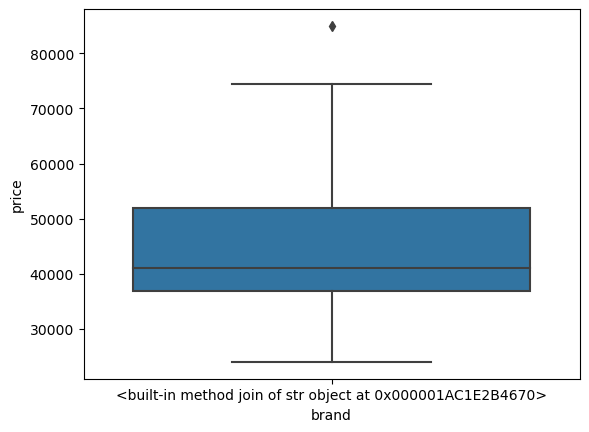

In [93]:
sns.boxplot(x=laptop_df.brand, y=laptop_df.price)

<AxesSubplot:xlabel='brand', ylabel='count'>

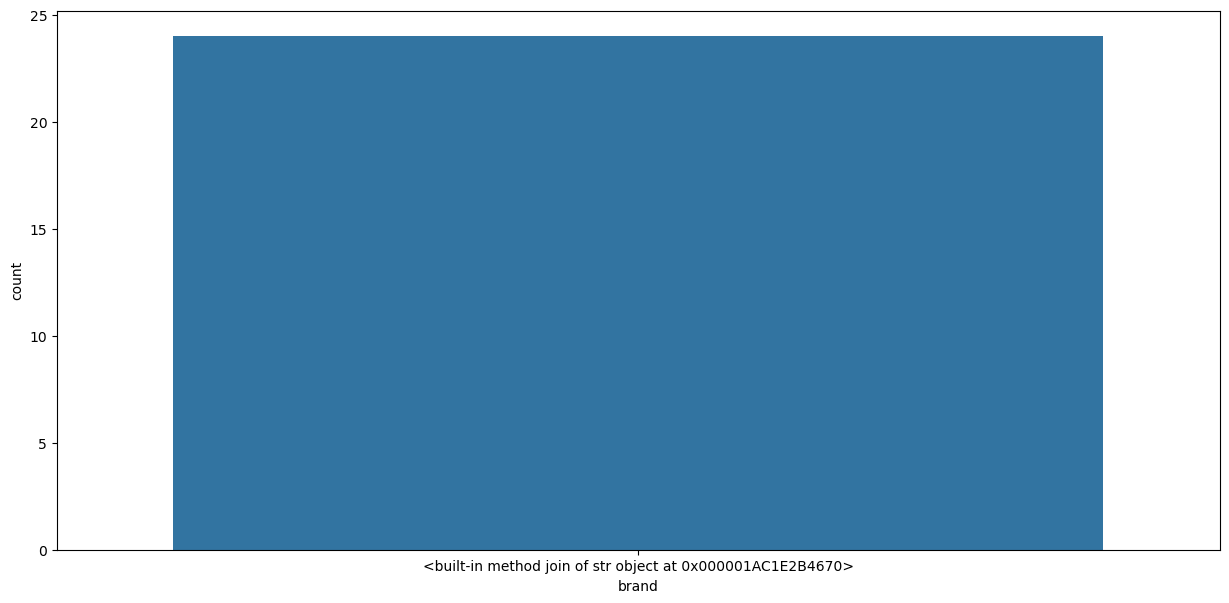

In [99]:
plt.figure(figsize=(15,7))
sns.countplot(x=laptop_df.brand)

In [101]:
laptop_df.Storage.value_counts()

<built-in method join of str object at 0x000001AC1E2B4670>    24
Name: Storage, dtype: int64

<AxesSubplot:xlabel='brand,Storage'>

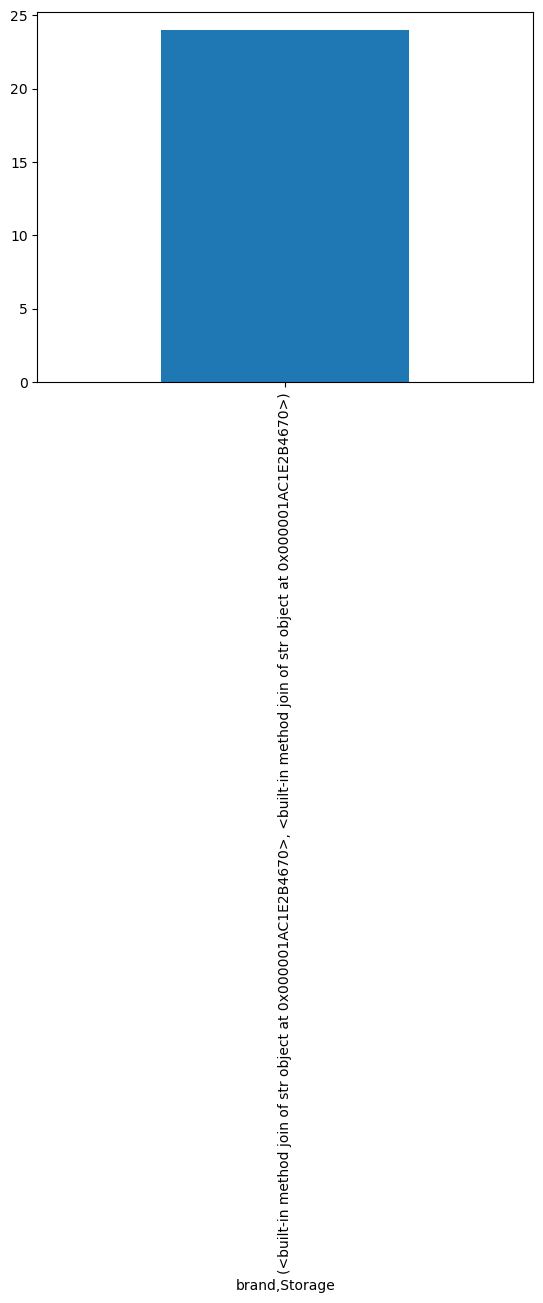

In [104]:
laptop_df.groupby(['brand', 'Storage'])['price'].count().plot(kind = 'bar')